In [2]:
!pip install vrplib

  Using cached vrplib-1.5.1-py3-none-any.whl.metadata (10 kB)
Using cached vrplib-1.5.1-py3-none-any.whl (24 kB)


In [7]:
!pip install openai

In [11]:
# 安装最新版openai（1.0.0+）
!pip install openai --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.0/599.0 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 0.28.0
    Uninstalling openai-0.28.0:
      Successfully uninstalled openai-0.28.0


Successfully read A-n32-k5.vrp
Successfully read A-n37-k5.vrp
Successfully read A-n48-k7.vrp
Successfully read P-n50-k10.vrp
===================== (Augerat et al, No of trucks: 5, Optimal value: 784) =====================
Number of Nodes: 32
{'id': 'chatcmpl-BK1fCyAXIsGgDzTefhWE5AtbjF0L0', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': "Given the details you've provided, we need to create a weight strategy that focuses on minimizing the total distance for the CVRP while still considering customer demand. Since minimizing distance is the primary goal, we can assign a higher weight to the distance component while still including some influence from demand.\n\n### Proposed Weight Values:\n1. **Demand Weight (`a`)**: This weight can be significantly lower, as we want to prioritize minimizing distance. A value of **1.0** is reasonable, as it still considers customer demand without prioritizing it excessively.\n\n2. **Distance Weight (`b`)**: Since the goal is to minimi

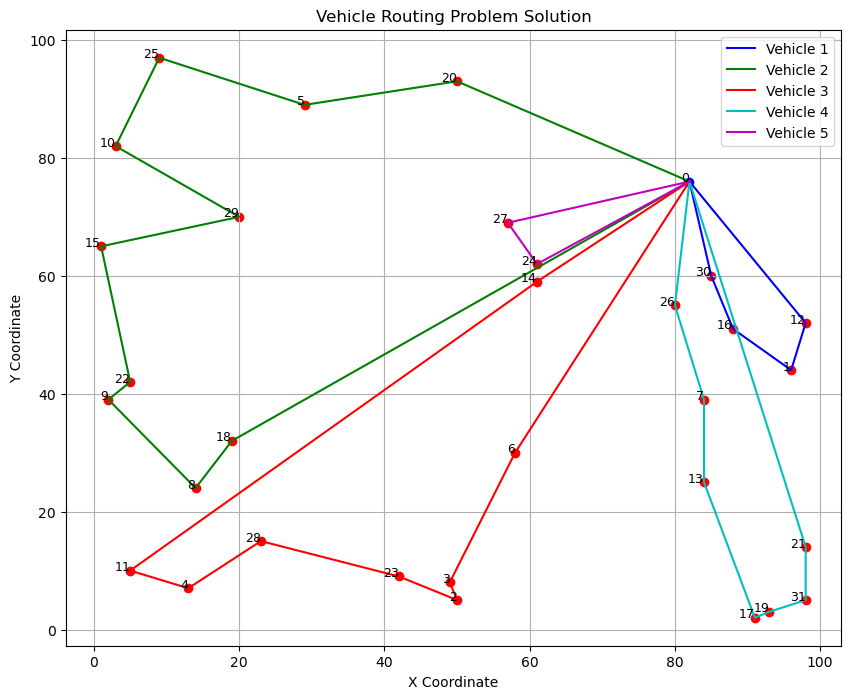

===================== (Augerat et al, No of trucks: 5, Optimal value: 669) =====================
Number of Nodes: 37
{'id': 'chatcmpl-BK1fZb4s1IQdT7HepFk5gxZqnuSLl', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': 'To construct a suitable node selection strategy for the Capacitated Vehicle Routing Problem (CVRP) given your requirement to minimize total distance while balancing customer demand and the distance from the current node, we can consider the following approach for the weight values:\n\n1. **Demand Weight (a)**: Lower values for demand weight will discourage the selection strategy from favoring nodes with high demand too heavily. Since the goal is to minimize distance, we can assign a smaller weight here. A value around `0.1` or `0.2` can work.\n\n2. **Distance Weight (b)**: Since the primary focus is on minimizing the distance between nodes, this weight should be higher than that for demand. A suitable value can be around `1.0` to `1.5`.\n\n3. **Constant 

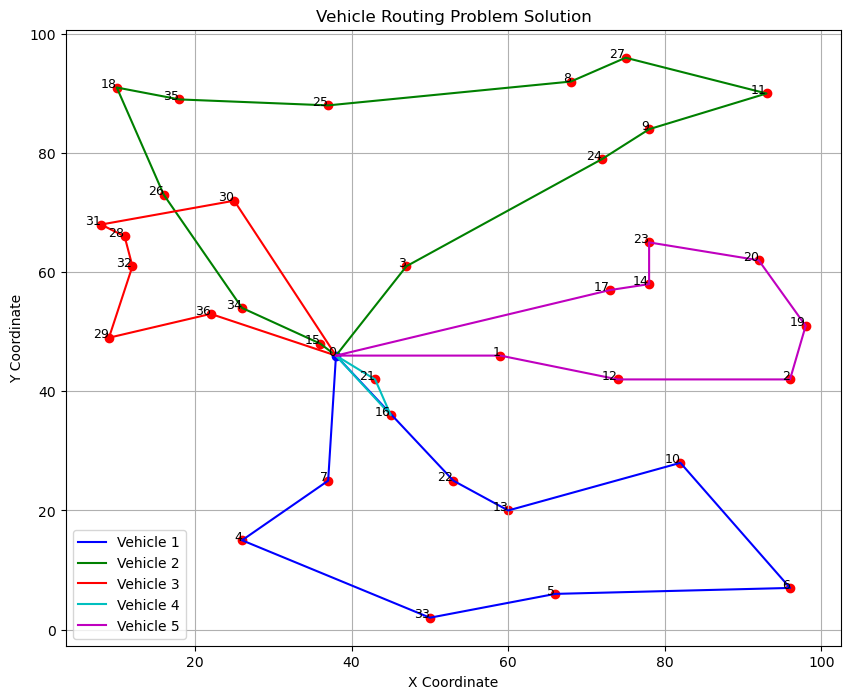

===================== (Augerat et al, No of trucks: 7, Optimal value: 1073) =====================
Number of Nodes: 48
{'id': 'chatcmpl-BK1fuEWVfZ8wxCwr84AW5JYrnA4Vj', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': "To generate a node selection strategy for the Capacitated Vehicle Routing Problem (CVRP) that emphasizes minimizing the total distance, we need to carefully consider the weights for customer demand, distance to the customer, and a constant term.\n\nGiven the data characteristics, we have:\n\n1. **Demands**: Ranging from 0 to 26.\n2. **Distance Matrix**: Ranging from 0 to 119, with an average distance of approximately 52.21.\n3. **Vehicle Capacity**: Set at 100.\n4. **Number of Vehicles**: 7.\n5. **Number of Nodes**: 48.\n\n### Weight Assignments\n\n1. **Weight for Demand (a)**: Typically, in CVRP, demand should impact the decision less than travel distance when minimizing distance. Hence, we will assign a relatively smaller value. Let's use `a = 0.1`.\n

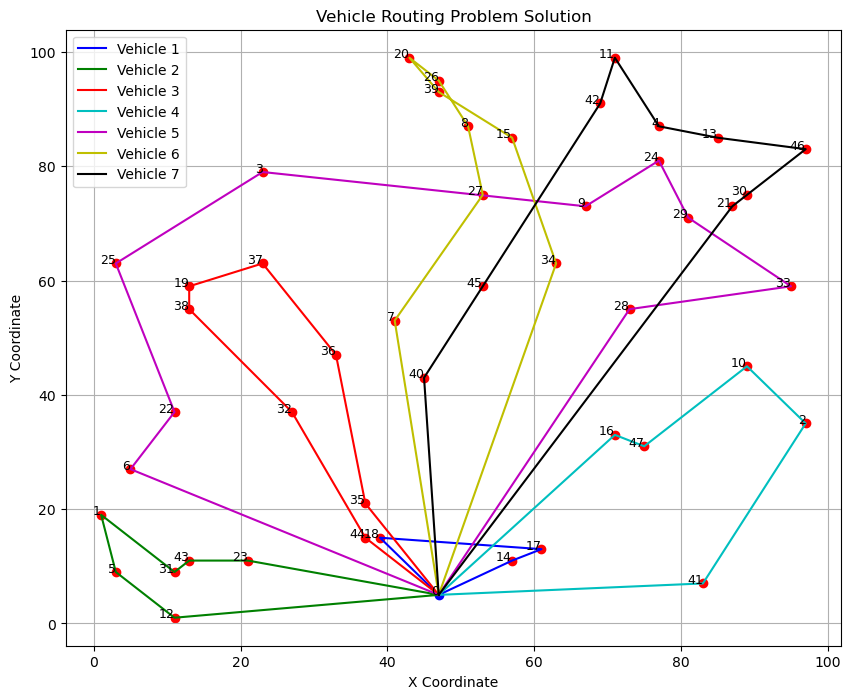

===================== (Augerat et al, No of trucks: 10, Optimal value: 696) =====================
Number of Nodes: 50
{'id': 'chatcmpl-BK1gF7Wpgw1ZwK8O61Fx8YHXYocUs', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': 'To minimize the total distance in the Capacitated Vehicle Routing Problem (CVRP) while also considering the demand of the customers, an effective weight setting strategy should encourage routes that prioritize closer nodes while balancing the customer demand.\n\nGiven your objective to minimize distance, we can set the weights as follows:\n\n1. **Weight for Demand (a)**: This weight should be relatively low since we are prioritizing distance. We can assign a low value, such as 0.1, so that we take demand into account but don’t heavily influence the route decisions based on it.\n\n2. **Weight for Distance (b)**: This weight should be significantly higher to emphasize minimizing travel distance. A reasonable value could be set at 1.0 or higher.\n\n3. **We

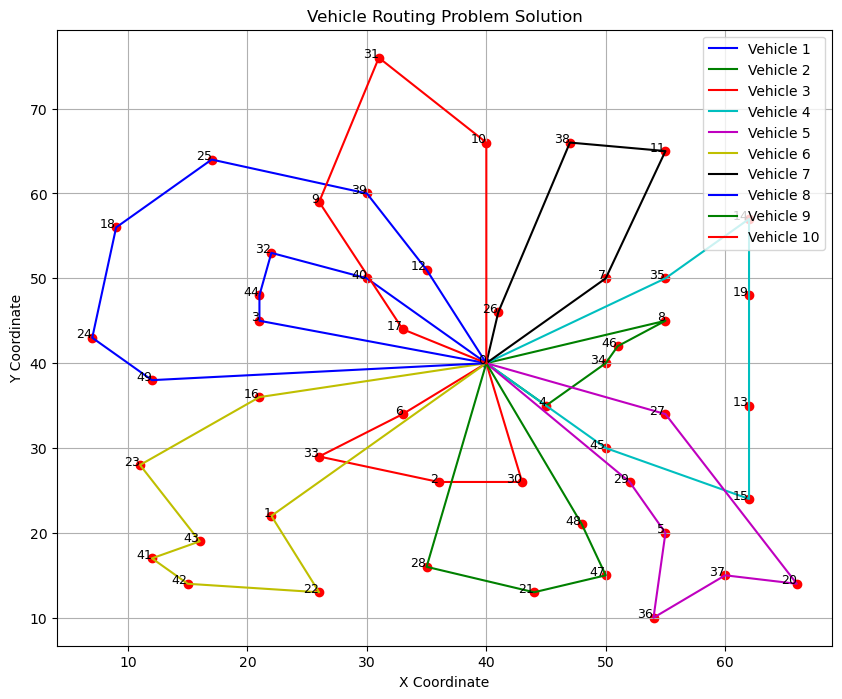

In [ ]:
import re
import os
import vrplib
import random
import matplotlib.pyplot as plt
import requests


# Read all instances
def read_all_instances(root_folder, ending='.tsp'):
    instances = []

    def extract_k_and_n_numbers(file_name):
        # Extract 'k' and 'n' numbers from the file name
        k_match = re.search(r'k(\d+)', file_name)
        n_match = re.search(r'n(\d+)', file_name)

        # If both matches are successful, return a tuple of (k, n)
        k = int(k_match.group(1)) if k_match else float('inf')
        n = int(n_match.group(1)) if n_match else float('inf')
        return k, n

    # Sort the file names according to (k, n)
    file_names = sorted(
        [file_name for file_name in os.listdir(root_folder) if file_name.endswith(ending)],
        key=extract_k_and_n_numbers
    )

    for file_name in file_names:
        instance = vrplib.read_instance(os.path.join(root_folder, file_name))
        if instance:
            instances.append(instance)
            print(f'Successfully read {file_name}')
        else:
            print(f'Failed to read {file_name}')

    return instances


# Define a function to visualize the solution
def plot_CVRP_solution(routes, node_coords):
    plt.figure(figsize=(10, 8))

    # Plot the nodes
    for i, (x, y) in enumerate(node_coords):
        plt.scatter(x, y, c='blue' if i == 0 else 'red')
        plt.text(x, y, f'{i}', fontsize=9, horizontalalignment='right')

    # Plot the routes
    colors = ['b', 'g', 'r', 'c','m', 'y', 'k']
    for vehicle, route in enumerate(routes):
        route_coords = [node_coords[0]] + [node_coords[node] for node in route] + [node_coords[0]]
        x_coords, y_coords = zip(*route_coords)
        plt.plot(x_coords, y_coords, c=colors[vehicle % len(colors)], label=f'Vehicle {vehicle + 1}')

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Vehicle Routing Problem Solution')
    plt.legend()
    plt.grid(True)
    plt.show()


# Define a function to test the vehicle capacity constraint
def test_capacity_constraint(routes, demands, vehicle_capacity):
    for vehicle, route in enumerate(routes):
        total_demand = sum(demands[node] for node in route)
        if total_demand > vehicle_capacity:
            print(f"Vehicle {vehicle + 1} exceeds capacity: {total_demand} > {vehicle_capacity}")
        else:
            print(f"Vehicle {vehicle + 1} is within capacity: {total_demand} <= {vehicle_capacity}")


# Define a function to calculate the route distance
def calculate_route_distance(route, distance_matrix):
    distance = 0
    if route:
        distance += distance_matrix[0][route[0]]  # From the depot to the first node
        for i in range(1, len(route)):
            distance += distance_matrix[route[i - 1]][route[i]]
        distance += distance_matrix[route[-1]][0]  # From the last node back to the depot
    return distance


# Define a function to calculate the total distance of all routes (CVRP)
def total_distance(routes, distance_matrix):
    return sum(calculate_route_distance(route, distance_matrix) for route in routes)


# Generate an initial solution using the greedy method
def greedy_initial_solution(distance_matrix, demands, num_vehicles, vehicle_capacity, num_nodes):
    routes = [[] for _ in range(num_vehicles)]
    current_load = [0] * num_vehicles
    visited = [False] * num_nodes
    visited[0] = True  # Start from the depot

    for vehicle in range(num_vehicles):
        current_node = 0
        while True:
            next_node = None
            min_distance = float('inf')
            for i in range(1, num_nodes):
                if not visited[i] and current_load[vehicle] + demands[i] <= vehicle_capacity:
                    if distance_matrix[current_node][i] < min_distance:
                        min_distance = distance_matrix[current_node][i]
                        next_node = i
            if next_node is None:
                break
            routes[vehicle].append(next_node)
            current_load[vehicle] += demands[next_node]
            visited[next_node] = True
            current_node = next_node
    return routes


# Destroy the solution
def destroy_solution(routes, num_customers_to_remove):
    # Flatten the routes to get a list of all customers
    all_customers = [customer for route in routes for customer in route]

    # Ensure that the number of customers to be removed does not exceed the total number of customers
    num_customers_to_remove = min(num_customers_to_remove, len(all_customers))

    # Randomly select the customers to be removed
    removed_customers = random.sample(all_customers, num_customers_to_remove)

    new_routes = []
    for route in routes:
        new_route = [customer for customer in route if customer not in removed_customers]
        new_routes.append(new_route)

    return new_routes, removed_customers


# Repair the solution
def repair_solution(routes, removed_customers, distance_matrix, demands, vehicle_capacity, num_vehicles):
    for customer in removed_customers:
        best_insertion = None
        best_cost_increase = float('inf')
        best_route_idx = None
        best_insert_position = None

        for route_idx, route in enumerate(routes):
            route_demand = sum(demands[node] for node in route)

            if route_demand + demands[customer] > vehicle_capacity:
                continue  # Skip this route

            for i in range(len(route) + 1):  # +1 allows the customer to be inserted at the end
                new_route = route[:i] + [customer] + route[i:]  # A - B -> Insert C. Cost(A-C-B) - Cost (A-B)
                cost_increase = calculate_route_distance(new_route, distance_matrix) - calculate_route_distance(route,
                                                                                                              distance_matrix)
                if cost_increase < best_cost_increase:
                    best_cost_increase = cost_increase
                    best_insertion = new_route
                    best_route_idx = route_idx
                    best_insert_position = i

        if best_insertion is not None:
            routes[best_route_idx] = best_insertion
        else:
            if len(routes) < num_vehicles:
                routes.append([customer])
            else:
                routes[0].append(customer)

    return routes


# Large neighborhood search algorithm
def large_neighborhood_search_cvrp(distance_matrix, demands, num_vehicles, vehicle_capacity, num_iterations=1000,
                                   destruction_size=5):
    current_routes = greedy_initial_solution(distance_matrix, demands, num_vehicles, vehicle_capacity,
                                             len(distance_matrix))
    current_cost = sum(calculate_route_distance(route, distance_matrix) for route in current_routes)
    best_routes = [route.copy() for route in current_routes]
    best_cost = current_cost

    for iteration in range(num_iterations):
        # Destruction phase
        partial_routes, removed_customers = destroy_solution(current_routes, destruction_size)

        # Repair phase
        repaired_routes = repair_solution(partial_routes, removed_customers, distance_matrix, demands, vehicle_capacity,
                                          num_vehicles)

        # Calculate the new cost of the repaired solution
        repaired_cost = sum(calculate_route_distance(route, distance_matrix) for route in repaired_routes)

        # Comparison
        if repaired_cost < current_cost:
            current_routes = [route.copy() for route in repaired_routes]
            current_cost = repaired_cost

            if current_cost < best_cost:
                best_routes = [route.copy() for route in current_routes]
                best_cost = current_cost

    return best_routes, best_cost


# Call the large language model to generate a strategy
def generate_strategy(data_detail_dict, all_strategy_results):
    prompt = f"""
    You are an expert in the CVRP (Capacitated Vehicle Routing Problem).
    The data you need to read this time is {data_detail_dict}. Please, according to the characteristics of this data, combined with the following code, return a weight value that conforms to the data characteristics.

    def generate_new_solution(strategy, distance_matrix, demands, num_vehicles, vehicle_capacity, num_nodes):
        routes = [[] for _ in range(num_vehicles)]
        current_load = [0] * num_vehicles
        visited = [False] * num_nodes
        visited[0] = True  # Start from the depot

        for vehicle in range(num_vehicles):
            current_node = 0
            while True:
                scores = []
                for i in range(1, num_nodes):
                    if not visited[i] and current_load[vehicle] + demands[i] <= vehicle_capacity:
                        score = strategy[0] * demands[i] + strategy[1] * distance_matrix[current_node][i] + strategy[2]
                        scores.append((score, i))
                    else:
                        scores.append((float('-inf'), i))
                best_score, best_node = max(scores)
                if best_score == float('-inf'):
                    break
                routes[vehicle].append(best_node)
                current_load[vehicle] += demands[best_node]
                visited[best_node] = True
                current_node = best_node
        return routes

    The following are the previous weight settings, corresponding routes, and cost information:
    {all_strategy_results}

    According to the above description and your understanding of the CVRP problem, note that: I currently hope to minimize the total distance as much as possible. Please assign the weights independently.
    Generate a node selection strategy for the CVRP problem. The strategy is represented by three weight values, which are respectively used to balance the customer demand and the distance from the current node to the customer. Please return these three weight values in the form of a list, for example, [a, b, c] (a, b, c are the real number weight values you set), and you can take any appropriate values you can think of for a, b, and c.
    """
    # Assume the request address of the API, which needs to be modified according to the actual situation
    api_url = "https://api.chatanywhere.org/v1/chat/completions"
    # Assume the request headers, add Bearer Token authentication, which needs to be modified according to the actual situation
    headers = {
        'User-Agent': 'Apifox/1.0.0 (https://apifox.com)',
        "Content-Type": "application/json",
        "Authorization": "Bearer sk-your api key"
    }
    data = {
        "messages": [{"role": "user", "content": prompt}],
        # Modify according to the model supported by api.chatanywhere.org
        "model": "gpt-3.5-turbo"
    }
    try:
        response = requests.post(api_url, headers=headers, json=data)
        if response.status_code == 200:
            result = response.json()
            print(result)  # Print the original response content

            choices = result.get('choices', [])
            if choices:
                strategy_str = choices[0].get('message', {}).get('content', "")

                # Optimize the regular expression to precisely match the format of [number, number, number]
                all_matches = re.findall(r'\[\s*\d+(?:\.\d+)?\s*,\s*\d+(?:\.\d+)?\s*,\s*\d+(?:\.\d+)?\s*\]', strategy_str)
                if all_matches:
                    # Take the last matching result
                    strategy_array = all_matches[-1]
                    try:
                        strategy = eval(strategy_array)  # Convert the string to a Python list
                        if isinstance(strategy, list) and len(strategy) == 3:
                            return strategy
                        else:
                            print("The returned strategy is not a valid list: ", strategy_array)
                    except Exception as inner_e:
                        print(f"Error parsing the strategy: {inner_e}")
                else:
                    print("No valid strategy array found.")
            else:
                print("No valid strategy data found: ", result)
        else:
            print(f"Request failed, status code: {response.status_code}, response content: {response.text}")
    except Exception as e:
        print(f"Error calling the large language model: {e}")
    return [random.random() for _ in range(3)]


# Generate a new solution according to the strategy
def generate_new_solution(strategy, distance_matrix, demands, num_vehicles, vehicle_capacity, num_nodes):
    routes = [[] for _ in range(num_vehicles)]
    current_load = [0] * num_vehicles
    visited = [False] * num_nodes
    visited[0] = True  # Start from the depot

    for vehicle in range(num_vehicles):
        current_node = 0
        while True:
            scores = []
            for i in range(1, num_nodes):
                if not visited[i] and current_load[vehicle] + demands[i] <= vehicle_capacity:
                    score = strategy[0] * demands[i] + strategy[1] * distance_matrix[current_node][i] + strategy[2]
                    scores.append((score, i))
                else:
                    scores.append((float('-inf'), i))
            best_score, best_node = max(scores)
            if best_score == float('-inf'):
                break
            routes[vehicle].append(best_node)
            current_load[vehicle] += demands[best_node]
            visited[best_node] = True
            current_node = best_node
    return routes


def large_neighborhood_search_cvrp_LLM(strategy, distance_matrix, demands, num_vehicles, vehicle_capacity, num_iterations=1000,
                                       destruction_size=5):
    current_routes = generate_new_solution(strategy, distance_matrix, demands, num_vehicles, vehicle_capacity,
                                           len(distance_matrix))
    current_cost = sum(calculate_route_distance(route, distance_matrix) for route in current_routes)
    best_routes = [route.copy() for route in current_routes]
    best_cost = current_cost

    for iteration in range(num_iterations):
        # Destruction phase
        partial_routes, removed_customers = destroy_solution(current_routes, destruction_size)

        # Repair phase
        repaired_routes = repair_solution(partial_routes, removed_customers, distance_matrix, demands, vehicle_capacity,
                                          num_vehicles)

        # Calculate the new cost of the repaired solution
        repaired_cost = sum(calculate_route_distance(route, distance_matrix) for route in repaired_routes)

        # Comparison
        if repaired_cost < current_cost:
            current_routes = [route.copy() for route in repaired_routes]
            current_cost = repaired_cost

            if current_cost < best_cost:
                best_routes = [route.copy() for route in current_routes]
                best_cost = current_cost

    return best_routes, best_cost


# FunSearch main loop
def funsearch(distance_matrix, demands, num_vehicles, vehicle_capacity, data_detail_dict, num_iterations=4):
    best_routes, best_cost = large_neighborhood_search_cvrp(distance_matrix, demands, num_vehicles, vehicle_capacity)
    best_strategy = None
    all_strategy_results = []

    for _ in range(num_iterations):
        strategy = generate_strategy(data_detail_dict, all_strategy_results)
        print(strategy)
        new_routes, new_cost = large_neighborhood_search_cvrp_LLM(strategy, distance_matrix, demands, num_vehicles,
                                                                  vehicle_capacity)
        print(new_cost)

        all_strategy_results.append((strategy, new_cost))

        if new_cost < best_cost:
            best_cost = new_cost
            best_routes = new_routes
            best_strategy = strategy

    return best_routes, best_cost, best_strategy, all_strategy_results


# Main program
if __name__ == "__main__":
    root_folder = './data/cvrp/small'
    cvrp_instances = read_all_instances(root_folder, ending='.vrp')

    global_best_cost = float('inf')
    global_best_routes = None
    global_best_strategy = None
    global_best_instance_name = None

    with open('results.txt', 'w') as f:
        for i in range(len(cvrp_instances)):
            cvrp_instance = cvrp_instances[i]
            vehicle_capacity = cvrp_instance['capacity']
            demands = cvrp_instance['demand']
            distance_matrix = [[int(value) for value in row] for row in cvrp_instance['edge_weight']]
            node_coords = cvrp_instance['node_coord']
            instance_name = cvrp_instance['comment']
            f.write(f"===================== {instance_name} =====================\n")
            
            print("=====================", instance_name, "=====================")
            match = re.search(r"No of trucks: (\d+)", str(cvrp_instance['comment']))
            if match:
                num_vehicles = int(match.group(1))
            else:
                match_min_no_of_trucks = re.search(r"Min no of trucks: (\d+)", str(cvrp_instance['comment']))
                if match_min_no_of_trucks:
                    num_vehicles = int(match_min_no_of_trucks.group(1))
                else:
                    num_vehicles = None

            num_nodes = len(node_coords)
            data_detail_dict = {
                    "instance_name": instance_name,
                    "vehicle_capacity": vehicle_capacity,
                    "demand_distribution": {
                        "min_demand": min(demands),
                        "max_demand": max(demands),
                  
                    },
                    "distance_matrix_properties": {
                        "min_distance": min([min(row) for row in distance_matrix]) if distance_matrix else 0,
                        "max_distance": max([max(row) for row in distance_matrix]) if distance_matrix else 0,
                        "average_distance": sum([sum(row) for row in distance_matrix]) / (len(distance_matrix) * len(distance_matrix[0])) if distance_matrix else 0
                    },
                    "num_vehicles": num_vehicles,
                    "num_nodes": num_nodes
                }
            print("Number of Nodes:", num_nodes)
            best_routes, best_cost, best_strategy, all_strategy_results = funsearch(distance_matrix, demands, num_vehicles, vehicle_capacity,data_detail_dict )
            print("Best routes found:", best_routes)
            print("Best total distance:", best_cost)
            print("Best strategy:", best_strategy)
            test_capacity_constraint(best_routes, demands, vehicle_capacity)
            plot_CVRP_solution(best_routes, node_coords)

            f.write(f"Best routes found: {best_routes}\n")
            f.write(f"Best total distance: {best_cost}\n")
            f.write(f"Best strategy: {best_strategy}\n")

            f.write("\nLLM Strategy Results:\n")
            for strategy, cost in all_strategy_results:
                f.write(f"Strategy: {strategy}, Cost: {cost}\n")

